# Taller 02

**Nombre:** 

Joel Stalin Tinitana Carrion

**Fecha:** 

2025-05-06


**3.** Dada la función

$$
f(x) = \frac{\sin(x)}{x}
$$

¿A partir de qué valor \( x_T \) se cumple que

$$
f(x) < 0.015,\ \forall x \geq x_T\ ?
$$


In [21]:
# Lista para almacenar los valores de g(x) en cada iteración
valores_gx = []

def g_with_output(x):
    """Función que almacena los valores de g(x) en cada iteración."""
    valores_gx.append(g(x))  # Guardar solo g(x)
    return g(x)

# Usar el método de Newton con full_output=True
x0 = 5  # Valor inicial
xT, info = newton(g_with_output, x0, fprime=g_prime, full_output=True)

# Mostrar los valores de g(x) en cada iteración
print("Valores de g(x) en cada iteración:")
for gx in valores_gx:
    print(f"{gx:.6f}")

# Mostrar el valor final de x_T
print(f"\nEl valor de x_T encontrado usando el método de Newton con x0={x0} es: {xT:.6f}")

Valores de g(x) en cada iteración:
-0.206785
0.093435
-0.080871
-0.001856
-0.000004
-0.000000

El valor de x_T encontrado usando el método de Newton con x0=5 es: 6.379017


In [ ]:
from matplotlib.animation import FuncAnimation, PillowWriter
from IPython.display import HTML
import numpy as np

import matplotlib.pyplot as plt

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(10, 6))
ax.axhline(0, color='black', linewidth=0.8, linestyle='--')  # Línea horizontal en y=0
ax.set_title("Método de Newton-Raphson - Visualización Interactiva")
ax.set_xlabel("x")
ax.set_ylabel("f(x)")

# Graficar la función f(x)
x_vals_plot = np.linspace(min(x_vals) - 1, max(x_vals) + 1, 1000)
y_vals_plot = np.sin(x_vals_plot) / x_vals_plot - 0.015
ax.plot(x_vals_plot, y_vals_plot, label="f(x)", color="blue")

# Inicializar los elementos de la animación
point, = ax.plot([], [], 'ro', label="Iteración")
line, = ax.plot([], [], '-', alpha=0.6, label="Línea de Iteración")
info_text = ax.text(0.05, 0.85, '', transform=ax.transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.8))

# Función de inicialización
def init():
    point.set_data([], [])
    line.set_data([], [])
    info_text.set_text('')
    return point, line, info_text

# Función de actualización para cada cuadro
def update(frame):
    if frame >= len(x_vals):
        return point, line, info_text

    x = x_vals[frame]
    y = np.sin(x) / x - 0.015
    slope = (np.cos(x) * x - np.sin(x)) / (x**2)
    x_tangent = np.linspace(x - 1, x + 1, 100)
    y_tangent = y + slope * (x_tangent - x)

    # Actualizar los datos del punto y la línea
    point.set_data([x], [y])
    line.set_data(x_tangent, y_tangent)
    line.set_color(plt.cm.viridis(frame / len(x_vals)))  # Cambiar color dinámicamente

    # Actualizar el texto informativo
    iteracion_txt = f'Iteración {frame + 1}/{len(x_vals)}: x = {x:.6f}, f(x) = {y:.6f}'
    if frame > 0:
        delta = abs(x_vals[frame] - x_vals[frame - 1])
        iteracion_txt += f', Δx = {delta:.6f}'
    info_text.set_text(iteracion_txt)

    return point, line, info_text

# Crear la animación
ani = FuncAnimation(fig, update, frames=len(x_vals), init_func=init, interval=800, blit=True, repeat=False)

# Configurar para visualización HTML
HTML(ani.to_jshtml())

# Guardar la animación como GIF
ani.save('newton_raphson_interactivo.gif', writer=PillowWriter(fps=1))

# Mostrar la animación en Jupyter Notebook
HTML(ani.to_jshtml())

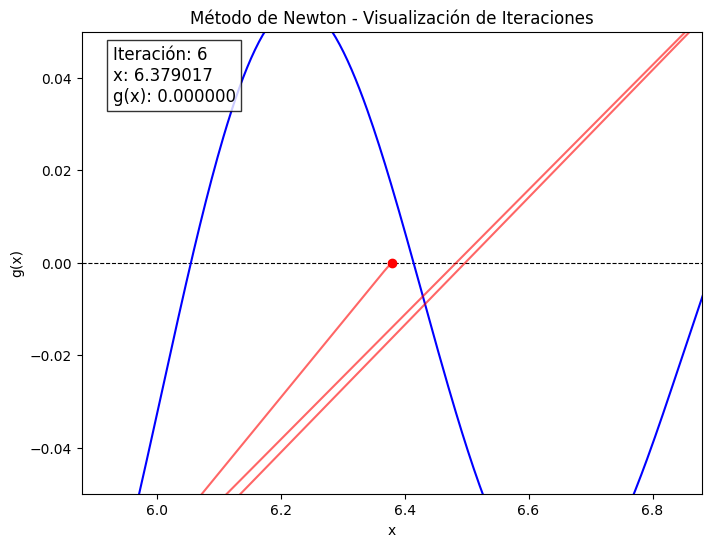

In [25]:
from matplotlib.animation import FuncAnimation, PillowWriter
from IPython.display import HTML

import matplotlib.pyplot as plt

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(8, 6))
ax.axhline(0, color='black', linewidth=0.8, linestyle='--')  # Línea horizontal en y=0
ax.set_title("Método de Newton - Visualización de Iteraciones")
ax.set_xlabel("x")
ax.set_ylabel("g(x)")

# Graficar la función g(x)
x_plot = np.linspace(min(x_vals) - 0.5, max(x_vals) + 0.5, len(y_plot))  # Ajustar límites para mayor acercamiento
ax.plot(x_plot, y_plot, label="g(x)", color="blue")
# Inicializar los elementos de la animación
point, = ax.plot([], [], 'ro', label="Iteración")
line, = ax.plot([], [], 'r-', alpha=0.6, label="Conexión")

# Agregar texto dinámico para mostrar los valores actuales
text = ax.text(0.05, 0.85, '', transform=ax.transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.8))

# Función de inicialización
def init():
    point.set_data([], [])
    line.set_data([], [])
    text.set_text('')
    return point, line, text

# Función de actualización para cada cuadro
def update(i):
    if i >= len(x_vals):
        return point, line, text

    x = x_vals[i]
    y = g(x)
    
    # Ajustar dinámicamente los límites del eje para mayor acercamiento
    ax.set_xlim(x - 0.5, x + 0.5)
    ax.set_ylim(y - 0.05, y + 0.05)
    
    point.set_data([x], [y])
    line.set_data(x_vals[:i+1], [g(xi) for xi in x_vals[:i+1]])
    text.set_text(f'Iteración: {i}\nx: {x:.6f}\ng(x): {y:.6f}')
    return point, line, text

# Crear la animación
ani = FuncAnimation(fig, update, frames=len(x_vals), init_func=init, interval=1000, blit=True, repeat=False)

# Mostrar la animación en Jupyter Notebook
HTML(ani.to_jshtml())

# Guardar la animación como GIF
ani.save("newton_method_animation_zoom.gif", writer=PillowWriter(fps=1))


In [3]:
from scipy.optimize import newton
import numpy as np

# Definimos la función g(x)
def g(x):
    return np.sin(x)/x - 0.015

# Derivada de g(x)
def g_prime(x):
    return (x * np.cos(x) - np.sin(x)) / (x**2)

# Valor inicial
x0 = 5

# Aplicamos el método de Newton usando scipy
xT = newton(g, x0, fprime=g_prime)
print(f"El valor de x_T es aproximadamente: {xT:.6f}")


El valor de x_T es aproximadamente: 6.379017


In [20]:
# Ajustar los límites del eje y para un zoom más cercano
ax.set_ylim(-0.1, 0.1)

# Agregar texto dinámico para mostrar los valores actuales
text = ax.text(0.05, 0.85, '', transform=ax.transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.8))

def animate(i):
    if i >= len(x_vals):
        return point, line, text

    x = x_vals[i]
    y = g(x)
    slope = g_prime(x)
    x_tangent = np.linspace(x - 2, x + 2, 100)
    y_tangent = y + slope * (x_tangent - x)

    point.set_data([x], [y])
    line.set_data(x_tangent, y_tangent)
    text.set_text(f'Iteración: {i}\nx: {x:.6f}\ng(x): {y:.6f}')

    return point, line, text

# Crear animación
ani = FuncAnimation(fig, animate, init_func=init,
                    frames=len(x_vals), interval=1200, blit=True, repeat=False)

# Mostrar en Jupyter
HTML(ani.to_jshtml())

ani.save("newton_anim.gif", writer='pillow', fps=1)
